In [1]:
import torch
import random
import scipy.spatial
import numpy as np
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
glove_matrix = np.load("../pretrain/glove_pubmed_embeddings.npy")

word_to_idx = np.load(r"../pretrain/glove_pubmed_vocab.npy",allow_pickle=True).item()

idx_to_word = {value: key for key, value in word_to_idx.items()}

In [3]:
def get_idx(word):
    idx = 0
    if word in word_to_idx.keys():
        idx = word_to_idx[word]
    else:
        idx = word_to_idx['<unk>']
    return idx

def get_idxes(words):
    idx = []
    for i in words:
        if i in word_to_idx.keys():
            idx.append(word_to_idx[i])
        else:
            idx.append(word_to_idx['<unk>'])
    return idx

def find_nearest(word, embedding_weights):
    index = get_idx(word)
    embedding = embedding_weights[index]
    cos_dis = np.array([scipy.spatial.distance.cosine(e, embedding) for e in embedding_weights])
    return [idx_to_word[i] for i in cos_dis.argsort()[:10]]

In [4]:
for word in ["one", "green", "computer"]:
    print(word, find_nearest(word, glove_matrix))

one ['one', 'two', 'three', 'four', 'five', 'zero', 'six', 'nine', 'eight', 'seven']
green ['green', 'fluorescent', 'stimulus', 'icg', 'complexes', 'electrode', 'propagation', 'chiral', 'echo', 'sensing']
computer ['computer', 'aided', 'sensors', 'robot', 'construction', 'liposomes', 'digital', 'sensing', 'assisted', 'sensor']


In [5]:
words = ['green', 'man', 'women']
idx = get_idxes(words)
vectors = []
for i in idx:
    vectors.append(glove_matrix[i])
input1 = torch.tensor(vectors[0]).resize(1, 50)
input2 = torch.tensor(vectors[1]).resize(1, 50)
input3 = torch.tensor(vectors[2]).resize(1, 50)
cos = nn.CosineSimilarity(dim=1)
print(cos(input1, input2))
print(cos(input1, input3))
print(cos(input3, input2))

tensor([-0.0662])
tensor([-0.0444])
tensor([0.6233])


d:\python38\lib\site-packages\torch\_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [6]:
indexs = ['computer', 'aided', 'sensors', 'robot', 'construction', 'liposomes', 'digital', 'sensing', 'assisted', 'sensor',
         'virus', 'hepatitis', 'viral', 'infection', 'cov', 'sars', 'hbv', 'influenza', 'corona', 'infections',
         'one', 'two', 'three', 'four', 'five', 'zero', 'six', 'nine', 'eight', 'seven']
random.shuffle(indexs)
ids = get_idxes(indexs)

wordvectors = []
for i in ids:
    wordvectors.append(glove_matrix[i])
wordvectors = np.array(wordvectors)
print(wordvectors.shape)

(30, 50)


In [7]:
from sklearn.decomposition import PCA
np.random.seed(10)

pca = PCA(n_components=2)
wordvectors = pca.fit_transform(wordvectors)
wordvectors = pd.DataFrame(wordvectors)

In [9]:
from sklearn.cluster import KMeans
classCount = 3
clf = KMeans(n_clusters=classCount)
clf.fit(wordvectors)
predicts = clf.predict(wordvectors)
for i, j in zip(indexs, clf.labels_):
    print(i, ":", j, end='   ')


digital : 0   one : 1   cov : 2   viral : 2   corona : 0   sensors : 0   aided : 0   sensing : 0   construction : 0   infection : 2   eight : 1   infections : 2   sensor : 0   four : 1   influenza : 2   assisted : 0   six : 1   zero : 1   three : 1   sars : 2   virus : 2   two : 1   liposomes : 0   nine : 1   seven : 1   hbv : 2   five : 1   hepatitis : 2   robot : 0   computer : 0   

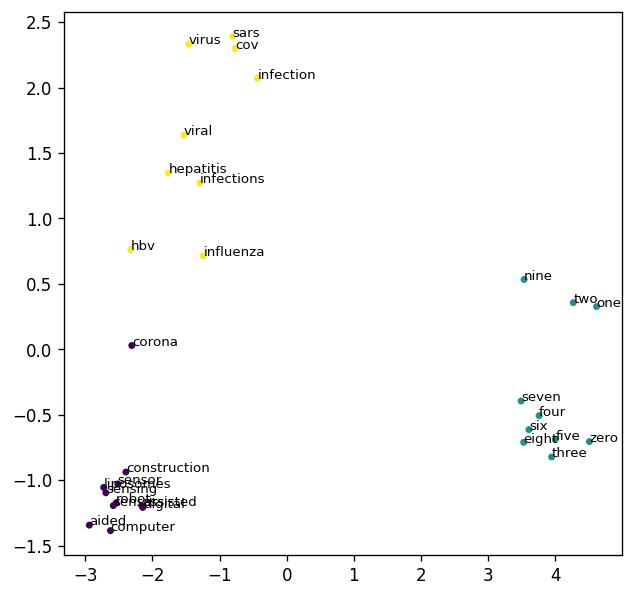

In [10]:
plt.figure(dpi=120, figsize=(6, 6))
plt.scatter(x=wordvectors[0],y=wordvectors[1],s=10, c=predicts)

for i, label in enumerate(indexs):
    plt.annotate(label, (wordvectors[0][i],wordvectors[1][i]), fontsize=8)
plt.show()

In [11]:
for word in ["medicine", "surgery", "virus", "diabetic", "myocardial"]:
    print(word, find_nearest(word, glove_matrix))

medicine ['medicine', 'traditional', 'chinese', 'herbal', 'precision', 'modern', 'marine', 'medicines', 'tcm', 'personalized']
surgery ['surgery', 'undergoing', 'after', 'following', 'underwent', 'prior', 'surgical', 'before', 'elective', 'patients']
virus ['virus', 'hepatitis', 'viral', 'infection', 'cov', 'sars', 'hbv', 'influenza', 'corona', 'infections']
diabetic ['diabetic', 'retinopathy', 'nephropathy', 'neuropathy', 'rats', 'tau', 'cough', 'dogs', 'dm', 'foot']
myocardial ['myocardial', 'infarction', 'mi', 'cerebral', 'ischemia', 'injury', 'ami', 'sepsis', 'reperfusion', 'ischemic']
